In [1]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox,inv_boxcox
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pred_accident = pd.read_csv('/content/drive/My Drive/AIT/Thesis/pred_accident.csv')

In [3]:
pred_accident.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


In [4]:
pred_accident_age = pred_accident.drop(['Local_Authority_(Highway)'], axis = 1).reset_index(drop = True)

In [5]:
pred_accident_age.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


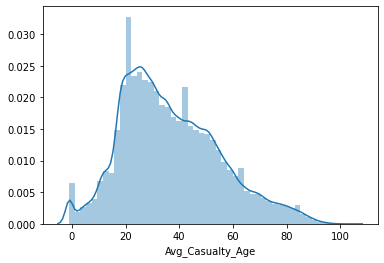

In [6]:
sns.distplot(pred_accident_age['Avg_Casualty_Age'])

In [7]:
pred_accident_age['Avg_Casualty_Age'].describe()

count    529103.000000
mean         36.773322
std          18.338962
min          -1.000000
25%          23.000000
50%          34.000000
75%          49.000000
max         104.000000
Name: Avg_Casualty_Age, dtype: float64

In [8]:
# Count unknown data from Avg_Casualty_Age column 
pred_accident_age[pred_accident_age['Avg_Casualty_Age'] == -1].count()

Location_Easting_OSGR                      6478
Location_Northing_OSGR                     6478
Longitude                                  6478
Latitude                                   6478
Police_Force                               6478
Accident_Severity                          6478
Number_of_Vehicles                         6478
Number_of_Casualties                       6478
Day_of_Week                                6478
Local_Authority_(District)                 6478
1st_Road_Class                             6478
1st_Road_Number                            6478
Road_Type                                  6478
Speed_limit                                6478
Junction_Detail                            6478
Junction_Control                           6478
2nd_Road_Class                             6478
2nd_Road_Number                            6478
Pedestrian_Crossing-Human_Control          6478
Pedestrian_Crossing-Physical_Facilities    6478
Light_Conditions                        

In [9]:
# Remove unknown data from Avg_Casualty_Age column
pred_accident_age = pred_accident_age[pred_accident_age['Avg_Casualty_Age'] > 0]

In [10]:
pred_accident_age['Avg_Casualty_Age'].describe()

count    522253.000000
mean         37.268060
std          17.939397
min           0.500000
25%          23.500000
50%          34.000000
75%          49.000000
max         104.000000
Name: Avg_Casualty_Age, dtype: float64

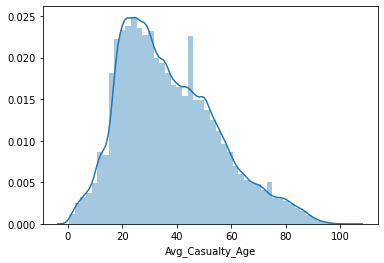

In [11]:
sns.distplot(pred_accident_age['Avg_Casualty_Age'])

In [12]:
pred_accident_age2 = pd.get_dummies(pred_accident_age, columns= ['Police_Force', 'Accident_Severity', 'Day_of_Week',
                                                                '1st_Road_Class', 'Road_Type', 'Junction_Detail',
                                                                'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                                                                'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                                                                'Weather_Conditions', 'Road_Surface_Conditions',
                                                                'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                                                'Urban_or_Rural_Area', 'Casualty_Gender'])

In [13]:
pred_accident_age2.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Number,Speed_limit,2nd_Road_Number,Avg_Casualty_Age,Hour,Min,Police_Force_1,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,...,Light_Conditions_7,Weather_Conditions_-1,Weather_Conditions_1,Weather_Conditions_2,Weather_Conditions_3,Weather_Conditions_4,Weather_Conditions_5,Weather_Conditions_6,Weather_Conditions_7,Weather_Conditions_8,Weather_Conditions_9,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Special_Conditions_at_Site_-1,Special_Conditions_at_Site_0,Special_Conditions_at_Site_1,Special_Conditions_at_Site_2,Special_Conditions_at_Site_3,Special_Conditions_at_Site_4,Special_Conditions_at_Site_5,Special_Conditions_at_Site_6,Special_Conditions_at_Site_7,Carriageway_Hazards_-1,Carriageway_Hazards_0,Carriageway_Hazards_1,Carriageway_Hazards_2,Carriageway_Hazards_3,Carriageway_Hazards_6,Carriageway_Hazards_7,Urban_or_Rural_Area_-1,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,525130,180050,-0.198465,51.505538,1,1,12,0,30,0,41.0,18,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,526530,178560,-0.178838,51.491836,1,1,12,0,30,3218,24.0,7,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,524610,181080,-0.205590,51.514910,1,1,12,415,30,0,33.0,18,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,524420,181080,-0.208327,51.514952,1,1,12,450,30,0,9.0,7,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,524630,179040,-0.206022,51.496572,2,1,12,315,30,3220,48.0,7,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [14]:
X = pred_accident_age2.drop(['Avg_Casualty_Age'], axis = 1)
y = pred_accident_age2['Avg_Casualty_Age']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Linear Regressor
lin_regressor_dummy = LinearRegression()  
lin_regressor_dummy.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = lin_regressor_dummy.predict(X_test)

In [18]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,40.0,36.545458
523110,22.0,41.422695
238822,52.0,36.948515
95239,15.0,31.512607
470688,61.0,32.859871
240396,19.0,33.663432
456563,72.0,35.845863
73916,65.0,31.920904
81790,13.0,37.801579
53,34.0,37.921439


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 14.28957630856958
Mean Squared Error: 310.52695340632096
Root Mean Squared Error: 17.621774978881128
R2 Score: 0.03451528593791897


In [20]:
pred_accident_age.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Casualty_Gender', 'Avg_Casualty_Age', 'Hour',
       'Min'],
      dtype='object')

In [21]:
# OLS (Ordinary Least Square) model for linear regression
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Avg_Casualty_Age   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:30:36   Log-Likelihood:            -1.5669e+06
No. Observations:              365577   AIC:                         3.134e+06
Df Residuals:                  365429   BIC:                         3.136e+06
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Location_Easting_OSGR                          0.0001   3.05e-05      3.583      0.000    4.95e-05       0.000
Location_Northing_OSGR                        -0.0001   6.01e-05     -2.262      0.024      -0.000   -1.82e-05
Longitude                                     -8.0304      2.074     -3.872      0.000     -12.095      -3.965
Latitude                                      15.2065      6.666      2.281      0.023       2.141      28.272
Number_of_Vehicles                             1.2590      0.043     28.956      0.000       1.174       1.344
Number_of_Casualties                          -1.7941      0.041    -43.873      0.000      -1.874      -1.714
Local_Authority_(District)                     0.0006      0.001      0.649      0.516      -0.001       0.002
1st_Road_Number                            -8.794e-05   2.08e-05     -4.230      0.000      -0.000   -4.72e-05
Speed_limit                                    0.0166      0.003      4.825      0.000       0.010       0.023
2nd_Road_Number                             8.793e-05   3.04e-05      2.888      0.004    2.82e-05       0.000
Hour                                          -0.0981      0.006    -16.636      0.000      -0.110      -0.087
Min                                            0.0010      0.002      0.583      0.560      -0.002       0.004
Police_Force_1                                -4.7967      2.345     -2.046      0.041      -9.392      -0.201
Police_Force_3                                -4.2694      2.348     -1.818      0.069      -8.872       0.333
Police_Force_4                                -5.2527      2.340     -2.245      0.025      -9.838      -0.667
Police_Force_5                                -4.4845      2.335     -1.920      0.055      -9.062       0.093
Police_Force_6                                -7.1856      2.344     -3.065      0.002     -11.780      -2.591
Police_Force_7                                -5.3411      2.343     -2.280      0.023      -9.933      -0.749
Police_Force_10                               -4.1880      2.326     -1.800      0.072      -8.747       0.371
Police_Force_11                               -5.5641      2.337     -2.381      0.017     -10.144      -0.984
Police_Force_12                               -3.2179      2.308     -1.395      0.163      -7.741       1.305
Police_Force_13                               -5.7560      2.321     -2.480      0.013     -10.306      -1.206
Police_Force_14                               -6.0124      2.319     -2.593      0.010     -10.557      -1.467
Police_Force_16                               -3.9930      2.252     -1.773      0.076      -8.406       0.420
Police_Force_17                               -4.8081      2.321     -2.072      0.038

In [22]:
y_pred = reg_OLS.predict(X_test)

In [23]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,40.0,36.545458
523110,22.0,41.422695
238822,52.0,36.948515
95239,15.0,31.512607
470688,61.0,32.859871
240396,19.0,33.663432
456563,72.0,35.845863
73916,65.0,31.920904
81790,13.0,37.801579
53,34.0,37.921439


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 14.289576308569508
Mean Squared Error: 310.5269534062979
Root Mean Squared Error: 17.621774978880474
R2 Score: 0.03451528593799069


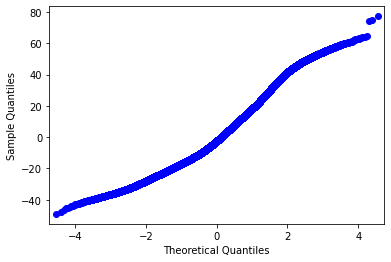

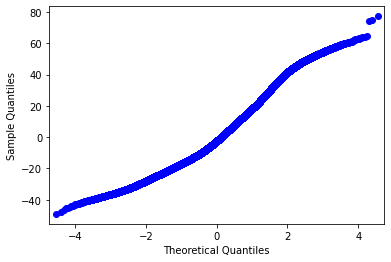

In [25]:
qqplot(reg_OLS.resid)

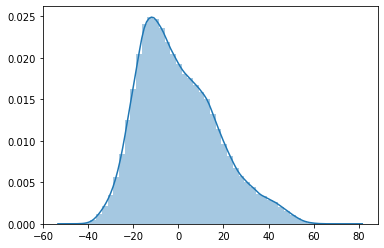

In [26]:
sns.distplot(reg_OLS.resid)

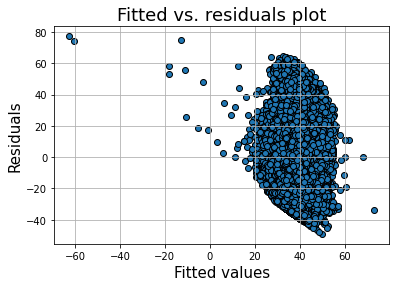

In [27]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

In [28]:
#pred_age_vif = pred_accident_age.drop(['Casualty_Gender'], axis = 1)
pred_age_vif = pd.get_dummies(pred_accident_age, columns = ['Casualty_Gender'])

In [29]:
pred_age_vif.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,41.0,18,45,0,1,0
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,24.0,7,50,0,0,1
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,33.0,18,8,0,1,0
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,9.0,7,40,0,1,0
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,48.0,7,30,0,0,1


In [30]:
# Function to calculate VIF
def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
    return(vif_df)

In [31]:
X = pred_age_vif.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Location_Easting_OSGR,30050.468244
1,Location_Northing_OSGR,136.773108
2,Longitude,2447.079154
3,Latitude,45945.718613
4,Police_Force,86.117952
5,Accident_Severity,46.856432
6,Number_of_Vehicles,8.541682
7,Number_of_Casualties,4.649469
8,Day_of_Week,5.569319
9,Local_Authority_(District),95.130671


In [32]:
# Columns with high VIF suggest multicollinearity, so if two columns have high VIF, one can be dropped 

In [33]:
pred_accident_age.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


In [34]:
# Police force indicates the area so coordinates and district name are not required
pred_age_ols = pred_accident_age.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)'], 
                                      axis = 1)

In [35]:
pred_age_ols = pd.get_dummies(pred_age_ols, columns = ['Casualty_Gender'])

In [36]:
pred_age_ols.head(5)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,1,3,1,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,41.0,18,45,0,1,0
1,1,3,1,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,24.0,7,50,0,0,1
2,1,3,1,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,33.0,18,8,0,1,0
3,1,3,1,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,9.0,7,40,0,1,0
4,1,2,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,48.0,7,30,0,0,1


In [37]:
X = pred_age_ols.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Police_Force,2.614762
1,Accident_Severity,27.792820
2,Number_of_Vehicles,8.257977
3,Number_of_Casualties,4.577387
4,Day_of_Week,5.389097
5,1st_Road_Class,10.780642
6,1st_Road_Number,1.363587
7,Road_Type,11.799548
8,Speed_limit,17.144031
9,Junction_Detail,3.987008


In [38]:
X = pred_age_ols.drop(['Avg_Casualty_Age'], axis = 1)
y = pred_age_ols['Avg_Casualty_Age']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Avg_Casualty_Age   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     506.2
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:32:53   Log-Likelihood:            -1.5680e+06
No. Observations:              365577   AIC:                         3.136e+06
Df Residuals:                  365551   BIC:                         3.136e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Police_Force                                0.0179      0.001     14.694      0.000       0.016       0.020
Accident_Severity                          -3.6070      0.070    -51.593      0.000      -3.744      -3.470
Number_of_Vehicles                          1.2228      0.043     28.384      0.000       1.138       1.307
Number_of_Casualties                       -1.8180      0.041    -44.521      0.000      -1.898      -1.738
Day_of_Week                                 0.0659      0.015      4.343      0.000       0.036       0.096
1st_Road_Class                             -0.5621      0.023    -24.069      0.000      -0.608      -0.516
1st_Road_Number                         -7.042e-05   1.75e-05     -4.017      0.000      -0.000   -3.61e-05
Road_Type                                  -0.0210      0.019     -1.097      0.273      -0.059       0.017
Speed_limit                                 0.0001      0.003      0.043      0.966      -0.006       0.006
Junction_Detail                             0.1522      0.017      8.868      0.000       0.119       0.186
Junction_Control                            0.1443      0.033      4.332      0.000       0.079       0.210
2nd_Road_Class                             -0.0237      0.025     -0.931      0.352      -0.074       0.026
2nd_Road_Number                             0.0001   2.58e-05      5.186      0.000    8.32e-05       0.000
Pedestrian_Crossing-Human_Control          -0.3027      0.149     -2.035      0.042      -0.594      -0.011
Pedestrian_Crossing-Physical_Facilities     0.0139      0.016      0.856      0.392      -0.018       0.046
Light_Conditions                           -0.8155      0.018    -44.701      0.000      -0.851      -0.780
Weather_Conditions                         -0.0078      0.018     -0.445      0.656      -0.042       0.027
Road_Surface_Conditions                    -0.4187      0.051     -8.163      0.000      -0.519      -0.318
Special_Conditions_at_Site                  0.0686      0.044      1.576      0.115      -0.017       0.154
Carriageway_Hazards                         0.1090      0.052      2.076      0.038       0.006       0.212
Urban_or_Rural_Area                         2.4951      0.086     28.915      0.000       2.326       2.664
Hour                                       -0.1010      0.006    -17.248      0.000      -0.112      -0.090
Min                                         0.0004      0.002      0.247      0.805      -0.003       0.004
Casualty_Gender_Both gender                51.2539      0.347    147.539      0.000      50.573      51.935
Casualty_Gender_Majority Female            50.1539      0.327    153.595      0.000      49.514      50.794
Casualty_Gender_Majority Male              47.7645      0.3

In [41]:
y_pred = reg_OLS.predict(X_test)

In [42]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,40.0,36.787593
523110,22.0,39.266754
238822,52.0,36.647336
95239,15.0,32.730804
470688,61.0,34.086126
240396,19.0,32.652601
456563,72.0,36.072582
73916,65.0,31.764049
81790,13.0,37.249511
53,34.0,37.784593


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 14.32352083007462
Mean Squared Error: 311.8010657572861
Root Mean Squared Error: 17.657889617881466
R2 Score: 0.03055383916055998


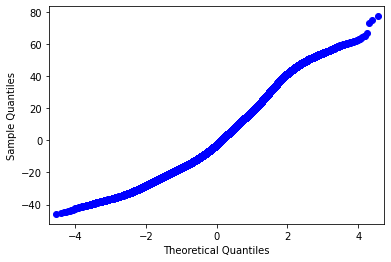

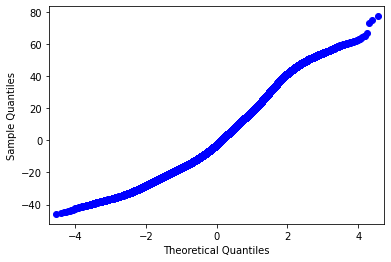

In [44]:
qqplot(reg_OLS.resid)

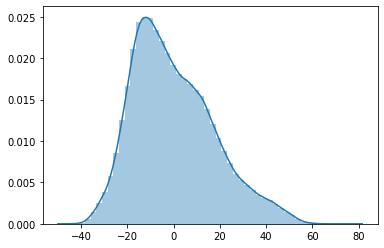

In [45]:
sns.distplot(reg_OLS.resid)

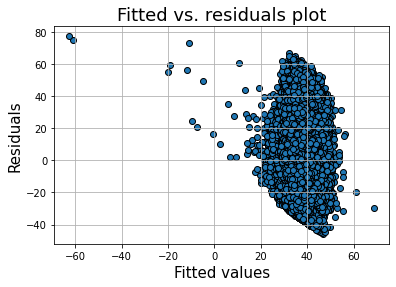

In [46]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

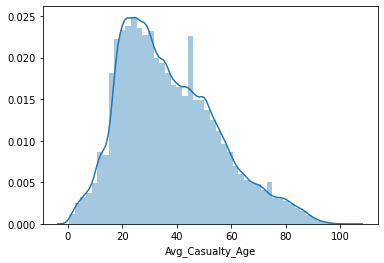

In [47]:
sns.distplot(pred_accident_age['Avg_Casualty_Age'])

In [48]:
skew(pred_accident_age['Avg_Casualty_Age'])

0.612868513077117

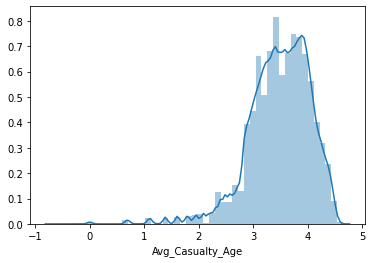

In [49]:
sns.distplot(np.log(pred_accident_age['Avg_Casualty_Age']))

In [50]:
skew(np.log(pred_accident_age['Avg_Casualty_Age']))

-1.0831324915320568

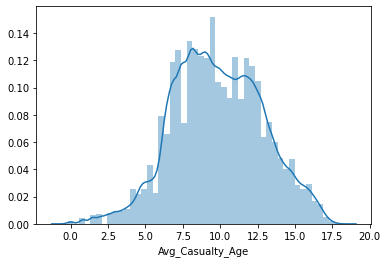

In [51]:
sns.distplot(boxcox(pred_accident_age['Avg_Casualty_Age'], 0.5))

In [52]:
 u = boxcox(pred_accident_age['Avg_Casualty_Age'], 0.5)
 skew(u)

-0.010865836952338087

In [53]:
pred_age_boxcox = pred_age_ols.copy()

In [54]:
pred_age_boxcox['Avg_Casualty_Age'] = boxcox(pred_accident_age['Avg_Casualty_Age'], 0.5)

In [107]:
pred_age_boxcox['Avg_Casualty_Age'].describe()

count    522253.000000
mean          9.836988
std           2.992986
min          -0.585786
25%           7.695360
50%           9.661904
75%          12.000000
max          18.396078
Name: Avg_Casualty_Age, dtype: float64

In [55]:
pred_age_boxcox.head(5)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,1,3,1,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,10.806248,18,45,0,1,0
1,1,3,1,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7.797959,7,50,0,0,1
2,1,3,1,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,9.489125,18,8,0,1,0
3,1,3,1,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,4.000000,7,40,0,1,0
4,1,2,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,11.856406,7,30,0,0,1


In [56]:
X = pred_age_boxcox.drop(['Avg_Casualty_Age'], axis = 1)
y = pred_age_boxcox['Avg_Casualty_Age']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Avg_Casualty_Age   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     537.2
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:33:00   Log-Likelihood:            -9.1296e+05
No. Observations:              365577   AIC:                         1.826e+06
Df Residuals:                  365551   BIC:                         1.826e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Police_Force                                0.0023      0.000     11.497      0.000       0.002       0.003
Accident_Severity                          -0.5383      0.012    -46.193      0.000      -0.561      -0.515
Number_of_Vehicles                          0.3195      0.007     44.500      0.000       0.305       0.334
Number_of_Casualties                       -0.2796      0.007    -41.089      0.000      -0.293      -0.266
Day_of_Week                                 0.0101      0.003      3.976      0.000       0.005       0.015
1st_Road_Class                             -0.1198      0.004    -30.776      0.000      -0.127      -0.112
1st_Road_Number                         -1.188e-05   2.92e-06     -4.064      0.000   -1.76e-05   -6.15e-06
Road_Type                                  -0.0108      0.003     -3.396      0.001      -0.017      -0.005
Speed_limit                                 0.0017      0.001      3.277      0.001       0.001       0.003
Junction_Detail                             0.0258      0.003      9.002      0.000       0.020       0.031
Junction_Control                            0.0209      0.006      3.768      0.000       0.010       0.032
2nd_Road_Class                              0.0052      0.004      1.235      0.217      -0.003       0.014
2nd_Road_Number                          2.358e-05    4.3e-06      5.487      0.000    1.52e-05     3.2e-05
Pedestrian_Crossing-Human_Control          -0.1016      0.025     -4.098      0.000      -0.150      -0.053
Pedestrian_Crossing-Physical_Facilities     0.0014      0.003      0.527      0.598      -0.004       0.007
Light_Conditions                           -0.1050      0.003    -34.519      0.000      -0.111      -0.099
Weather_Conditions                          0.0031      0.003      1.077      0.281      -0.003       0.009
Road_Surface_Conditions                    -0.0513      0.009     -6.005      0.000      -0.068      -0.035
Special_Conditions_at_Site                  0.0218      0.007      3.001      0.003       0.008       0.036
Carriageway_Hazards                         0.0228      0.009      2.602      0.009       0.006       0.040
Urban_or_Rural_Area                         0.4217      0.014     29.318      0.000       0.393       0.450
Hour                                       -0.0216      0.001    -22.086      0.000      -0.023      -0.020
Min                                        -0.0002      0.000     -0.626      0.531      -0.001       0.000
Casualty_Gender_Both gender                11.8186      0.058    204.123      0.000      11.705      11.932
Casualty_Gender_Majority Female            11.5940      0.054    213.036      0.000      11.487      11.701
Casualty_Gender_Majority Male              11.2343      0.0

In [59]:
y_pred = reg_OLS.predict(X_test)

In [60]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,10.649111,9.873346
523110,7.380832,10.185053
238822,12.422205,9.964241
95239,5.745967,8.981974
470688,13.620499,9.240699
240396,6.717798,9.080784
456563,14.970563,9.652178
73916,14.124515,9.040757
81790,5.211103,9.884743
53,9.661904,9.993274


In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.389202668383877
Mean Squared Error: 8.657498524492794
Root Mean Squared Error: 2.942362745225815
R2 Score: 0.03294761594694029


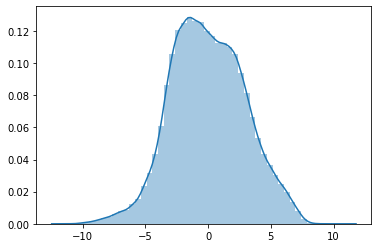

In [62]:
sns.distplot(reg_OLS.resid)

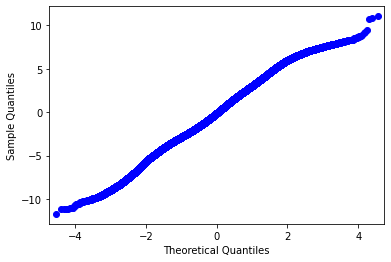

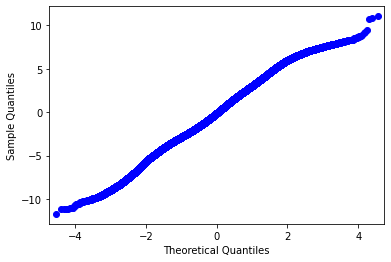

In [63]:
qqplot(reg_OLS.resid)

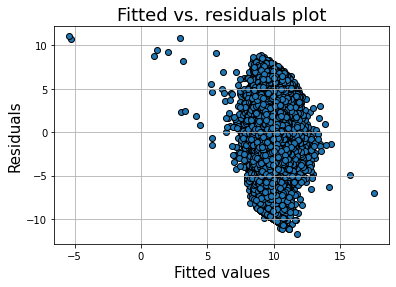

In [64]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

In [65]:
pred_df_orig = pd.DataFrame({'Actual': inv_boxcox(y_test,0.5), 'Predicted': inv_boxcox(y_pred,0.5)})
pred_df_orig.head(10)

,Actual,Predicted
216965,40.0,35.244084
523110,22.0,37.118876
238822,52.0,35.785765
95239,15.0,30.150939
470688,61.0,31.588327
240396,19.0,30.695946
456563,72.0,33.943313
73916,65.0,30.474577
81790,13.0,35.311778
53,34.0,35.959656


In [66]:
pred_age_boxcox.head(5)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,1,3,1,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,10.806248,18,45,0,1,0
1,1,3,1,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7.797959,7,50,0,0,1
2,1,3,1,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,9.489125,18,8,0,1,0
3,1,3,1,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,4.000000,7,40,0,1,0
4,1,2,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,11.856406,7,30,0,0,1


In [67]:
pred_age_boxcox_dummy = pd.get_dummies(pred_age_boxcox, columns= ['Police_Force', 'Accident_Severity', 'Day_of_Week',
                                                                '1st_Road_Class', 'Road_Type', 'Junction_Detail',
                                                                'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                                                                'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                                                                'Weather_Conditions', 'Road_Surface_Conditions',
                                                                'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                                                'Urban_or_Rural_Area'])

In [68]:
pred_age_boxcox_dummy.head(5)

,Number_of_Vehicles,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male,Police_Force_1,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,Police_Force_42,Police_Force_43,...,Light_Conditions_4,Light_Conditions_5,Light_Conditions_6,Light_Conditions_7,Weather_Conditions_-1,Weather_Conditions_1,Weather_Conditions_2,Weather_Conditions_3,Weather_Conditions_4,Weather_Conditions_5,Weather_Conditions_6,Weather_Conditions_7,Weather_Conditions_8,Weather_Conditions_9,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Special_Conditions_at_Site_-1,Special_Conditions_at_Site_0,Special_Conditions_at_Site_1,Special_Conditions_at_Site_2,Special_Conditions_at_Site_3,Special_Conditions_at_Site_4,Special_Conditions_at_Site_5,Special_Conditions_at_Site_6,Special_Conditions_at_Site_7,Carriageway_Hazards_-1,Carriageway_Hazards_0,Carriageway_Hazards_1,Carriageway_Hazards_2,Carriageway_Hazards_3,Carriageway_Hazards_6,Carriageway_Hazards_7,Urban_or_Rural_Area_-1,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3
0,1,1,0,30,0,10.806248,18,45,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,0,30,3218,7.797959,7,50,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,1,415,30,0,9.489125,18,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,450,30,0,4.000000,7,40,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,2,1,315,30,3220,11.856406,7,30,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [99]:
X = pred_age_boxcox_dummy.drop(['Avg_Casualty_Age'], axis = 1)
y = pred_age_boxcox_dummy['Avg_Casualty_Age']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Avg_Casualty_Age   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:40:51   Log-Likelihood:            -9.1187e+05
No. Observations:              365577   AIC:                         1.824e+06
Df Residuals:                  365434   BIC:                         1.826e+06
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Number_of_Vehicles                             0.3282      0.007     45.286      0.000       0.314       0.342
Number_of_Casualties                          -0.2750      0.007    -40.360      0.000      -0.288      -0.262
1st_Road_Number                            -1.287e-05   3.46e-06     -3.717      0.000   -1.97e-05   -6.08e-06
Speed_limit                                    0.0056      0.001      9.830      0.000       0.005       0.007
2nd_Road_Number                             1.462e-05   5.07e-06      2.883      0.004    4.68e-06    2.46e-05
Hour                                          -0.0213      0.001    -21.722      0.000      -0.023      -0.019
Min                                        -9.129e-05      0.000     -0.329      0.742      -0.001       0.000
Casualty_Gender_Both gender                    1.6887      0.122     13.814      0.000       1.449       1.928
Casualty_Gender_Majority Female                1.4590      0.122     11.982      0.000       1.220       1.698
Casualty_Gender_Majority Male                  1.1028      0.122      9.061      0.000       0.864       1.341
Police_Force_1                                 0.0161      0.017      0.959      0.338      -0.017       0.049
Police_Force_3                                 0.3556      0.050      7.121      0.000       0.258       0.453
Police_Force_4                                 0.1230      0.031      3.986      0.000       0.063       0.183
Police_Force_5                                 0.2907      0.037      7.866      0.000       0.218       0.363
Police_Force_6                                -0.2491      0.032     -7.854      0.000      -0.311      -0.187
Police_Force_7                                 0.1034      0.038      2.718      0.007       0.029       0.178
Police_Force_10                                0.1606      0.035      4.610      0.000       0.092       0.229
Police_Force_11                               -0.0908      0.055     -1.653      0.098      -0.198       0.017
Police_Force_12                                0.2570      0.041      6.315      0.000       0.177       0.337
Police_Force_13                               -0.0644      0.027     -2.345      0.019      -0.118      -0.011
Police_Force_14                               -0.1505      0.034     -4.402      0.000      -0.218      -0.084
Police_Force_16                                0.0460      0.037      1.245      0.213      -0.026       0.118
Police_Force_17                               -0.0248      0.063     -0.391      0.696      -0.149       0.099
Police_Force_20                               -0.2471      0.026     -9.643      0.000      -0.297      -0.197
Police_Force_21                               -0.1273      0.040     -3.201      0.001

In [102]:
y_pred = reg_OLS.predict(X_test)

In [103]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,10.649111,9.834268
523110,7.380832,10.521818
238822,12.422205,9.938298
95239,5.745967,8.839042
470688,13.620499,9.012341
240396,6.717798,9.247057
456563,14.970563,9.655780
73916,14.124515,9.082643
81790,5.211103,10.042432
53,9.661904,10.027267


In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.383852831231835
Mean Squared Error: 8.620966981538421
Root Mean Squared Error: 2.936148324172064
R2 Score: 0.037028230642653814


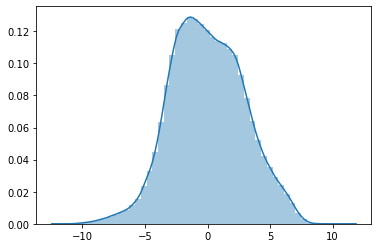

In [75]:
sns.distplot(reg_OLS.resid)

In [76]:
skew(reg_OLS.resid)

0.03191197867574463

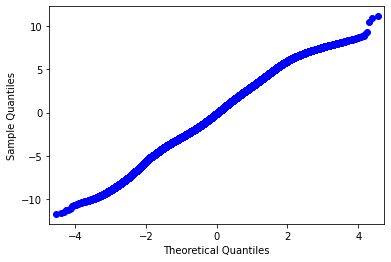

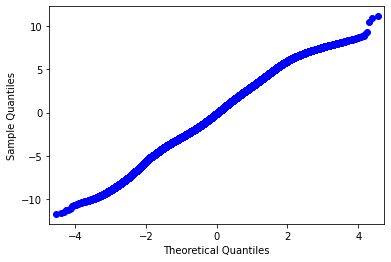

In [77]:
qqplot(reg_OLS.resid)

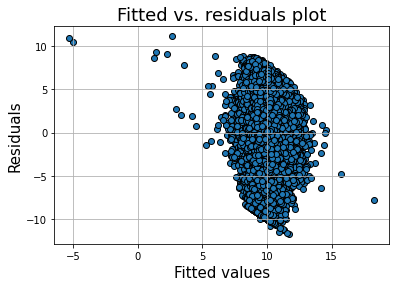

In [78]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

In [79]:
pred_df_orig = pd.DataFrame({'Actual': inv_boxcox(y_test,0.5), 'Predicted': inv_boxcox(y_pred,0.5)})
pred_df_orig.head(10)

,Actual,Predicted
216965,40.0,35.012476
523110,22.0,39.198984
238822,52.0,35.630743
95239,15.0,29.371208
470688,61.0,30.317911
240396,19.0,31.624075
456563,72.0,33.964302
73916,65.0,30.706242
81790,13.0,36.255041
53,34.0,36.163788


In [80]:
pred_age_rf = pred_age_ols.copy()
pred_age_rf.head(5)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Avg_Casualty_Age,Hour,Min,Casualty_Gender_Both gender,Casualty_Gender_Majority Female,Casualty_Gender_Majority Male
0,1,3,1,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,41.0,18,45,0,1,0
1,1,3,1,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,24.0,7,50,0,0,1
2,1,3,1,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,33.0,18,8,0,1,0
3,1,3,1,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,9.0,7,40,0,1,0
4,1,2,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,48.0,7,30,0,0,1


In [81]:
X = pred_age_rf.drop(['Avg_Casualty_Age'], axis = 1)
y = pred_age_rf['Avg_Casualty_Age']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
y_pred = reg_rf.predict(X_test)

In [85]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,40.0,38.525000
523110,22.0,49.433333
238822,52.0,39.842778
95239,15.0,36.550000
470688,61.0,24.270000
240396,19.0,34.385000
456563,72.0,35.045000
73916,65.0,33.310000
81790,13.0,37.025000
53,34.0,38.295000


In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 14.076282212665598
Mean Squared Error: 308.0264231687235
Root Mean Squared Error: 17.55068155852426
R2 Score: 0.04228988873799011


In [92]:
# KNN Regressor
#rmse_val = [] #to store rmse values for different k
#k = [50, 100, 150, 200, 250, 300]
#for K in k:
#    model = KNeighborsRegressor(n_neighbors = K)
#    model.fit(X_train, y_train)  #fit the model
#    pred=model.predict(X_test) #make prediction on test set
#   error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  50 is: 17.85400459795372
RMSE value for k=  100 is: 17.799096007839903
RMSE value for k=  150 is: 17.786945206480073
RMSE value for k=  200 is: 17.78799690249866
RMSE value for k=  250 is: 17.788255434511868
RMSE value for k=  300 is: 17.792445502897234


In [88]:
#params = {'n_neighbors':[21,22,23,24,25,26,27,28,19,30]}

#knn = KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=5)
#model.fit(X_train,y_train)
#model.best_params_

In [93]:
#rmse_val = [] #to store rmse values for different k
#k = [110, 120, 130, 140, 150, 160, 170, 180, 190]
#for K in k:
#    model = KNeighborsRegressor(n_neighbors = K)
#    model.fit(X_train, y_train)  #fit the model
#    pred=model.predict(X_test) #make prediction on test set
#    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  110 is: 17.795885420233603
RMSE value for k=  120 is: 17.793879867445153
RMSE value for k=  130 is: 17.79113983786155
RMSE value for k=  140 is: 17.789664603568518
RMSE value for k=  150 is: 17.786945206480073
RMSE value for k=  160 is: 17.787914076272845
RMSE value for k=  170 is: 17.78890047954347
RMSE value for k=  180 is: 17.787387994496104
RMSE value for k=  190 is: 17.787470099967845


In [94]:
# k = 150 is selected since rmse is lowest
reg_knn = KNeighborsRegressor(n_neighbors = 150)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=150, p=2,
                    weights='uniform')

In [95]:
y_pred = reg_knn.predict(X_test)

In [96]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(10)

,Actual,Predicted
216965,40.0,38.511444
523110,22.0,43.776444
238822,52.0,39.275556
95239,15.0,34.890000
470688,61.0,30.511111
240396,19.0,36.469000
456563,72.0,32.902444
73916,65.0,40.162667
81790,13.0,36.089000
53,34.0,36.856667


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 14.477215152035464
Mean Squared Error: 316.3754197783245
Root Mean Squared Error: 17.786945206480073
R2 Score: 0.0163313414495736
